https://pysal.org/libpysal/notebooks/weights.html

In [3]:
import sys
import os

In [4]:
sys.path.append(os.path.abspath('..'))
import libpysal

In [5]:
libpysal.examples.available()

                      Name                                                  Description  Installed
0                    10740  Albuquerque, New Mexico, Census 2000 Tract Data. 10740 i...       True
1                   AirBnB         Airbnb rentals, socioeconomics, and crime in Chicago      False
2                  Atlanta                 Atlanta, GA region homicide counts and rates      False
3                Baltimore                    Baltimore house sales prices and hedonics      False
4                Bostonhsg                         Boston housing and neighborhood data      False
5              Buenosaires                Electoral Data for 1999 Argentinean Elections      False
6              Charleston1   2000 Census Tract Data for Charleston, SC MSA and counties      False
7              Charleston2   1998 and 2001 Zip Code Business Patterns (Census Bureau...      False
8           Chicago Health                             Chicago Health + Socio-Economics      False
9         

In [6]:
libpysal.examples.explain('mexico')

mexico

Decennial per capita incomes of Mexican states 1940-2000
--------------------------------------------------------

* mexico.csv: attribute data. (n=32, k=13)
* mexico.gal: spatial weights in GAL format.
* mexicojoin.shp: Polygon shapefile. (n=32)

Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.



In [7]:
import geopandas
pth = libpysal.examples.get_path("mexicojoin.shp")
gdf = geopandas.read_file(pth)

from libpysal.weights import Queen, Rook, KNN

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

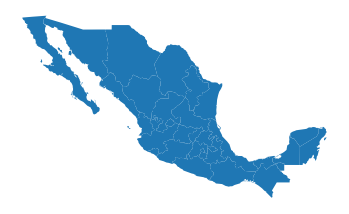

In [9]:
ax = gdf.plot()
ax.set_axis_off()

In [23]:
gdf.shape

(32, 35)

In [10]:
gdf.head()

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7252751.376,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7225987.769,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2731956.859,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7961008.285,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,546702.985,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."


In [11]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   POLY_ID     32 non-null     int64   
 1   AREA        32 non-null     float64 
 2   CODE        32 non-null     object  
 3   NAME        32 non-null     object  
 4   PERIMETER   32 non-null     float64 
 5   ACRES       32 non-null     float64 
 6   HECTARES    32 non-null     float64 
 7   PCGDP1940   32 non-null     float64 
 8   PCGDP1950   32 non-null     float64 
 9   PCGDP1960   32 non-null     float64 
 10  PCGDP1970   32 non-null     float64 
 11  PCGDP1980   32 non-null     float64 
 12  PCGDP1990   32 non-null     float64 
 13  PCGDP2000   32 non-null     float64 
 14  HANSON03    32 non-null     float64 
 15  HANSON98    32 non-null     float64 
 16  ESQUIVEL99  32 non-null     float64 
 17  INEGI       32 non-null     float64 
 18  INEGI2      32 non-null     float64 
 19  MA

##Contiguity Weights

The first set of spatial weights we illustrate use notions of contiguity to define neighboring observations. Rook neighbors are those states that share an edge on their respective borders:

Rookのモジュールでどこと隣り合ってるかが計算される？

gdfのどのカラム使ってるんだろう？geometry?

In [12]:
w_rook = Rook.from_dataframe(gdf)
w_rook.n

32

In [13]:
w_rook.pct_nonzero

12.6953125

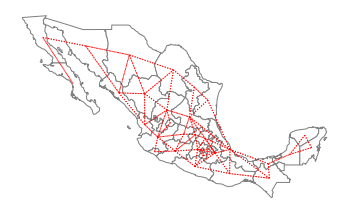

In [14]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_rook.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

In [19]:
w_rook.neighbors[0] # the first location has two neighbors at locations 1 and 22

[1, 22]

In [21]:
w_rook.neighbors[2]

[27, 25, 26, 3]

In [22]:
gdf['NAME'][[0, 1, 22]]

0     Baja California Norte
1       Baja California Sur
22                   Sonora
Name: NAME, dtype: object

In [24]:
gdf['NAME'][[2] + w_rook.neighbors[2]]

2       Nayarit
27    Zacatecas
25      Sinaloa
26      Durango
3       Jalisco
Name: NAME, dtype: object

Queen neighbors are based on a more inclusive condition that requires only a shared vertex between two states:

Queenは

In [27]:
w_queen = Queen.from_dataframe(gdf)

In [31]:
w_queen.n, gdf.shape[0]

(32, 32)

In [33]:
# 全体のnは一緒ってこと？
w_queen.n == w_rook.n

True

In [34]:
# pctって何？
(w_queen.pct_nonzero > w_rook.pct_nonzero) == (w_queen.n == w_rook.n)

True

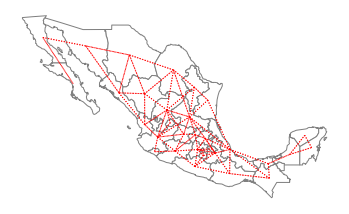

In [35]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_queen.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

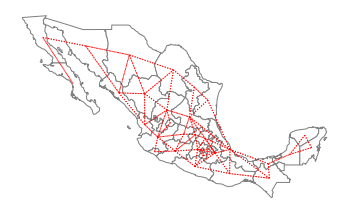

In [37]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_rook.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

若干Rookより多い？

In [38]:
w_queen.histogram

[(1, 1), (2, 6), (3, 6), (4, 6), (5, 5), (6, 2), (7, 3), (8, 2), (9, 1)]

In [39]:
w_rook.histogram

[(1, 1), (2, 6), (3, 7), (4, 7), (5, 3), (6, 4), (7, 3), (8, 1)]

In [40]:
c9 = [idx for idx,c in w_queen.cardinalities.items() if c==9]

In [41]:
gdf['NAME'][c9]

28    San Luis Potosi
Name: NAME, dtype: object

In [42]:
w_queen.cardinalities

{0: 2,
 1: 1,
 2: 4,
 3: 7,
 4: 2,
 5: 5,
 6: 5,
 7: 6,
 8: 6,
 9: 8,
 10: 2,
 11: 2,
 12: 4,
 13: 2,
 14: 3,
 15: 7,
 16: 2,
 17: 3,
 18: 5,
 19: 4,
 20: 3,
 21: 3,
 22: 3,
 23: 4,
 24: 5,
 25: 4,
 26: 5,
 27: 8,
 28: 9,
 29: 4,
 30: 3,
 31: 7}

In [43]:
w_rook.neighbors[28]

[5, 6, 7, 27, 29, 30, 31]

In [44]:
w_queen.neighbors[28]

[3, 5, 6, 7, 24, 27, 29, 30, 31]

(-105.0, -95.0, 21.0, 26.0)

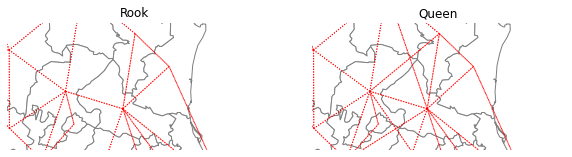

In [45]:
import numpy as np
f,ax = plt.subplots(1,2,figsize=(10, 6), subplot_kw=dict(aspect='equal'))
gdf.plot(edgecolor='grey', facecolor='w', ax=ax[0])
w_rook.plot(gdf, ax=ax[0],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[0].set_title('Rook')
ax[0].axis(np.asarray([-105.0, -95.0, 21, 26]))

ax[0].axis('off')
gdf.plot(edgecolor='grey', facecolor='w', ax=ax[1])
w_queen.plot(gdf, ax=ax[1],
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax[1].set_title('Queen')
ax[1].axis('off')
ax[1].axis(np.asarray([-105.0, -95.0, 21, 26]))

In [46]:
w_knn = KNN.from_dataframe(gdf, k=4)

In [47]:
w_knn.histogram

[(4, 32)]

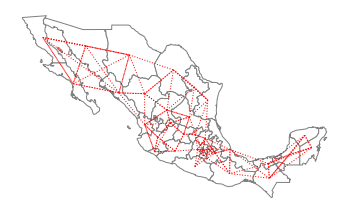

In [48]:
ax = gdf.plot(edgecolor='grey', facecolor='w')
f,ax = w_knn.plot(gdf, ax=ax,
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()